In [1]:
import requests
from bs4 import BeautifulSoup
import time
import random
import pandas as pd
import numpy as np


    


def get_pages():
    urls = [f"https://basketball.realgm.com/nba/stats/2023/Averages/Qualified/points/All/desc/{i}/Regular_Season" for i in range(1,5)]
    
    html = requests.get(urls[0]).content
    time.sleep(random.uniform(1,3))
    soup = BeautifulSoup(html, 'html.parser')

    table = soup.find_all('table', {"data-tablesaw-mode":"swipe"})[0]
    stats = [stat.text for stat in table.find('thead').find_all('th')][1:]
    stats_df = pd.DataFrame(columns=stats)

    for url in urls:
        html = requests.get(url).content
        time.sleep(random.uniform(1,3))
        soup = BeautifulSoup(html, 'html.parser')
        
        try:
            table = soup.find_all('table', {"data-tablesaw-mode":"swipe"})[0]
        except Exception:
            break
        else:
            player_stats_list = []
            rows = table.find('tbody').find_all('tr')
            for row in rows:
                player_stats = row.getText(separator='***').split('***')[1:]
                player_stats_list.append(player_stats)


            stats_df = pd.concat([stats_df, pd.DataFrame(player_stats_list, columns=stats)])
        
    return stats_df

        


data_df = get_pages()

In [2]:
data = data_df.copy()

for column in data.columns[2:]:
    data[column] = [float(point) for point in data[column]]

data

,Player,Team,GP,MPG,PPG,FGM,FGA,FG%,3PM,3PA,...,FTA,FT%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF
0,Luka Doncic,DAL,11.0,36.9,33.6,11.5,23.6,0.488,2.5,8.5,...,11.0,0.736,0.8,7.5,8.3,7.9,2.0,0.6,3.4,3.3
1,Stephen Curry,GSW,10.0,35.1,32.6,10.8,21.1,0.512,5.3,12.3,...,6.1,0.934,0.8,6.3,7.1,6.9,1.1,0.1,2.6,2.1
2,Donovan Mitchell,CLE,10.0,39.2,31.9,11.3,22.0,0.514,4.3,9.6,...,5.8,0.862,1.1,3.1,4.2,5.8,1.3,0.6,3.4,3.2
3,Giannis Antetokounmpo,MIL,9.0,32.7,31.8,11.4,21.1,0.542,0.9,3.3,...,12.3,0.649,1.9,10.3,12.2,5.3,1.1,1.4,3.3,2.9
4,Shai Gilgeous-Alexander,OKC,10.0,36.7,31.6,11.7,21.8,0.537,0.9,2.8,...,7.7,0.948,1.0,3.5,4.5,5.6,1.9,1.5,3.1,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Josh Okogie,PHX,10.0,4.9,1.2,0.4,1.2,0.333,0.0,0.6,...,0.6,0.667,0.3,0.9,1.2,0.0,0.3,0.1,0.4,0.6
93,"Paul Reed, Jr.",PHI,9.0,7.4,0.7,0.3,1.2,0.273,0.0,0.2,...,0.0,0.000,0.4,1.3,1.8,0.1,1.2,0.4,0.3,1.7
94,KZ Okpala,SAC,6.0,6.4,0.5,0.2,0.8,0.200,0.2,0.7,...,0.0,0.000,0.3,0.7,1.0,0.3,0.0,0.0,0.0,0.7
95,Jaxson Hayes,NOP,5.0,7.4,0.4,0.2,1.0,0.200,0.0,0.4,...,0.4,0.000,0.2,0.8,1.0,0.6,0.2,0.2,0.2,1.0


Get Player Positions

In [3]:
def get_positions():
    url = "https://basketball.realgm.com/nba/players"
    html = requests.get(url).content
    time.sleep(random.uniform(1,3))
    soup = BeautifulSoup(html, 'html.parser')

    table_class = soup.find_all("table", {"data-tablesaw-mode": "swipe"})[0].find("tbody")
    rows = table_class.find_all("tr")

    player_positions = { rows[i].find("td", {"data-th": "Player"}).text: rows[i].find("td", {"data-th": "Pos"}).text
                         for i in range(len(rows)) }
    
    positions = []
    for player in data['Player']:
        try:
            position = player_positions[player]
        except Exception:
            position = None
        finally:
            positions.append(position)

    data['Position'] = positions

get_positions()

In [4]:
df = data.copy()

df.loc[df['Position'].isin(['SF','PF']), 'Position'] = 'F'
df.loc[df['Position'].isin(['SG','PG']), 'Position'] = 'G'

df

,Player,Team,GP,MPG,PPG,FGM,FGA,FG%,3PM,3PA,...,FT%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF,Position
0,Luka Doncic,DAL,11.0,36.9,33.6,11.5,23.6,0.488,2.5,8.5,...,0.736,0.8,7.5,8.3,7.9,2.0,0.6,3.4,3.3,F
1,Stephen Curry,GSW,10.0,35.1,32.6,10.8,21.1,0.512,5.3,12.3,...,0.934,0.8,6.3,7.1,6.9,1.1,0.1,2.6,2.1,G
2,Donovan Mitchell,CLE,10.0,39.2,31.9,11.3,22.0,0.514,4.3,9.6,...,0.862,1.1,3.1,4.2,5.8,1.3,0.6,3.4,3.2,G
3,Giannis Antetokounmpo,MIL,9.0,32.7,31.8,11.4,21.1,0.542,0.9,3.3,...,0.649,1.9,10.3,12.2,5.3,1.1,1.4,3.3,2.9,F
4,Shai Gilgeous-Alexander,OKC,10.0,36.7,31.6,11.7,21.8,0.537,0.9,2.8,...,0.948,1.0,3.5,4.5,5.6,1.9,1.5,3.1,2.6,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Josh Okogie,PHX,10.0,4.9,1.2,0.4,1.2,0.333,0.0,0.6,...,0.667,0.3,0.9,1.2,0.0,0.3,0.1,0.4,0.6,G
93,"Paul Reed, Jr.",PHI,9.0,7.4,0.7,0.3,1.2,0.273,0.0,0.2,...,0.000,0.4,1.3,1.8,0.1,1.2,0.4,0.3,1.7,F
94,KZ Okpala,SAC,6.0,6.4,0.5,0.2,0.8,0.200,0.2,0.7,...,0.000,0.3,0.7,1.0,0.3,0.0,0.0,0.0,0.7,G
95,Jaxson Hayes,NOP,5.0,7.4,0.4,0.2,1.0,0.200,0.0,0.4,...,0.000,0.2,0.8,1.0,0.6,0.2,0.2,0.2,1.0,F


Graphing all combonations of features to check for correlation or covariability

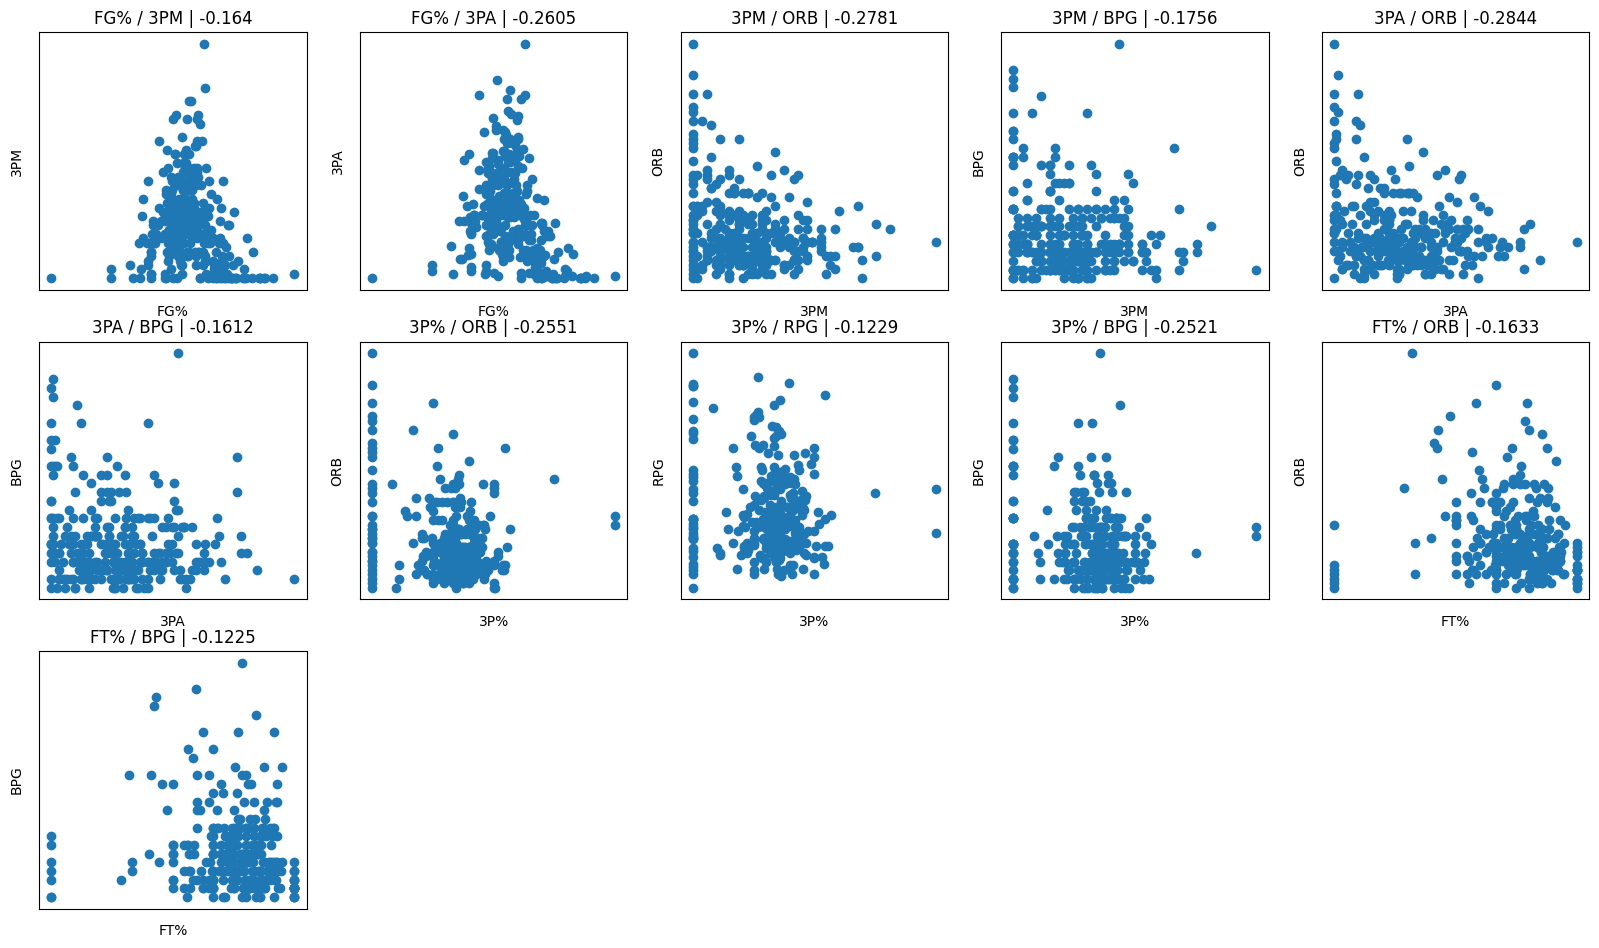

In [64]:
import matplotlib.pyplot as plt

all_features = df.columns[2:-1]


combos = []
for x in range(len(all_features)):
    for y in range(x+1,len(all_features)):
        combos.append((all_features[x],all_features[y]))


fig = plt.figure(figsize=(20,152))

fig_rows = 38
fig_cols = 5

cur_subplot = 1

for i in range(1,fig_rows*fig_cols+1):
    try:
        correlation_coefficient = np.round(np.corrcoef(df[combos[i][0]],df[combos[i][1]])[0][1], decimals=4)   
    except Exception:
        break
    else:
        if correlation_coefficient > -0.1:
            continue

        ax = fig.add_subplot(fig_rows,fig_cols,cur_subplot)
        cur_subplot += 1
        ax.scatter(df[combos[i][0]],df[combos[i][1]])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.xaxis.set_ticks_position('none') 
        ax.yaxis.set_ticks_position('none')
        plt.xlabel(combos[i][0])
        plt.ylabel(combos[i][1])
        correlation_coefficient = np.round(np.corrcoef(df[combos[i][0]],df[combos[i][1]])[0][1], decimals=4)
        ax.set_title(f"{combos[i][0]} / {combos[i][1]} | {correlation_coefficient}")

plt.show()

In [6]:
# cluster on 2d and original dimesions
# https://dash.plotly.com/layout

In [66]:
from sklearn.decomposition import PCA
import plotly.express as px

fig = px.scatter(df, x='ORB', y='3P%',
                 hover_name='Player')
fig.show()





# X = np.array(df[all_features])
# print(X)
# df[all_features]

# pca = PCA(n_components=2)

# principalComponents = pca.fit_transform(X)

# plt.scatter(principalComponents[:,0],
#             principalComponents[:,1])
# plt.show()